# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data("output/q5_cleaned_data.csv")
print(f"Loaded {len(df)} patients")


# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.

    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind="bar", color="#f4a7b9")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [27]:
# TODO: Group by site
site_summary = (
    df.groupby("site")[["age", "bmi", "systolic_bp", "diastolic_bp"]]
    .mean()
    .round(2)
    .reset_index()
)

print("Mean Age, BMI, And Blood Pressure By Site:")
display(site_summary)

Mean Age, BMI, And Blood Pressure By Site:


,site,age,bmi,systolic_bp,diastolic_bp
0,site a,56.36,25.88,117.34,73.53
1,site b,62.40,25.72,117.13,73.30
2,site c,57.31,25.80,117.94,73.65
3,site d,63.49,25.59,117.89,73.60
4,site e,57.06,25.51,117.48,73.72


In [28]:
# TODO: Count by intervention group
intervention_counts = (
    df.groupby("intervention_group")["patient_id"].count().reset_index()
)
intervention_counts.columns = ["intervention_group", "patient_count"]

print("\nPatient Counts By Intervention Group:")
display(intervention_counts)


Patient Counts By Intervention Group:


,intervention_group,patient_count
0,control,3337
1,treatment a,3321
2,treatment b,3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [29]:
# TODO: Use summarize_by_group utility
overall_summary = summarize_by_group(
    df, group_col="site", agg_dict={"age": ["mean", "std"], "bmi": ["mean", "std"]}
)

print("\nOverall Summary Statistics By Site:")
display(overall_summary)


Overall Summary Statistics By Site:


age                    bmi          
             mean         std       mean       std
site                                              
site a  56.364005  162.536292  25.878687  4.912664
site b  62.401957  139.050180  25.718997  4.911263
site c  57.312108  157.941868  25.800241  5.278374
site d  63.491006  136.140058  25.588541  5.725171
site e  57.064897  157.697644  25.511504  5.878845

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [30]:
# TODO: Multiple aggregations
for col in ["age", "bmi", "systolic_bp"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

multi_agg = df.groupby("site").agg(
    {
        "age": ["mean", "std", "min", "max"],
        "bmi": ["mean", "std"],
        "systolic_bp": ["mean", "median"],
    }
)

multi_agg = multi_agg.round(2)
multi_agg.columns = ["_".join(col).strip() for col in multi_agg.columns.values]

print("Multiple Aggregations By Site:")
display(multi_agg)

Multiple Aggregations By Site:


,age_mean,age_std,age_min,age_max,bmi_mean,bmi_std,systolic_bp_mean,systolic_bp_median
site,,,,,,,,
site a,56.36,162.54,-999,100,25.88,4.91,117.34,117.0
site b,62.40,139.05,-999,100,25.72,4.91,117.13,117.0
site c,57.31,157.94,-999,100,25.80,5.28,117.94,117.0
site d,63.49,136.14,-999,100,25.59,5.73,117.89,117.0
site e,57.06,157.70,-999,100,25.51,5.88,117.48,117.0


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [ ]:
# TODO: Intervention group comparisons
# Clean outcome_cvd and adherence_pct so they're numeric
for col in ["outcome_cvd", "adherence_pct"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace(
                {"yes": 1, "no": 0, "true": 1, "false": 0, "na": np.nan, "": np.nan}
            )
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Calculate mean outcome_cvd rate by intervention_group
df_copy = df.copy()
cvd_summary = (
    df_copy.groupby("intervention_group")["outcome_cvd"]
    .mean()
    .reset_index(name="mean_outcome_cvd")
)
print(cvd_summary)

# Calculate mean adherence_pct by intervention_group
adherence_summary = (
    df_copy.groupby("intervention_group")["adherence_pct"]
    .mean()
    .reset_index(name="mean_adherence_pct")
)
print(adherence_summary)

# Create a cross-tabulation of intervention_group vs dropout
cross_tab_inter_dropout = pd.crosstab(df_copy["intervention_group"], df_copy["dropout"])
print(cross_tab_inter_dropout)

  intervention_group  mean_outcome_cvd
0            control          0.336530
1        treatment a          0.319482
2        treatment b          0.333633
  intervention_group  mean_adherence_pct
0            control           60.830686
1        treatment a           60.474255
2        treatment b           61.149013
dropout               No  Yes
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471


<Figure size 1000x600 with 0 Axes>

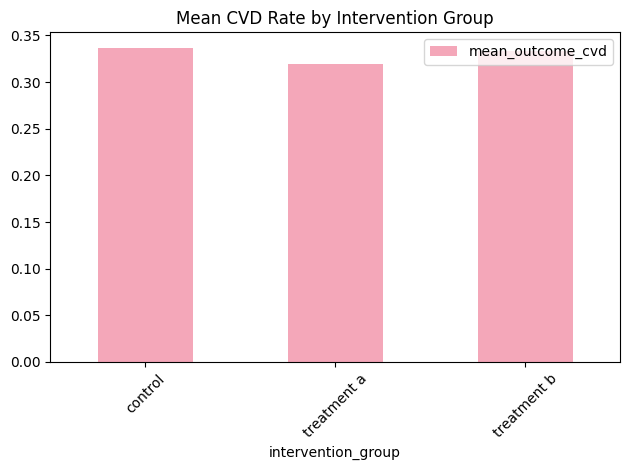

<Figure size 1000x600 with 0 Axes>

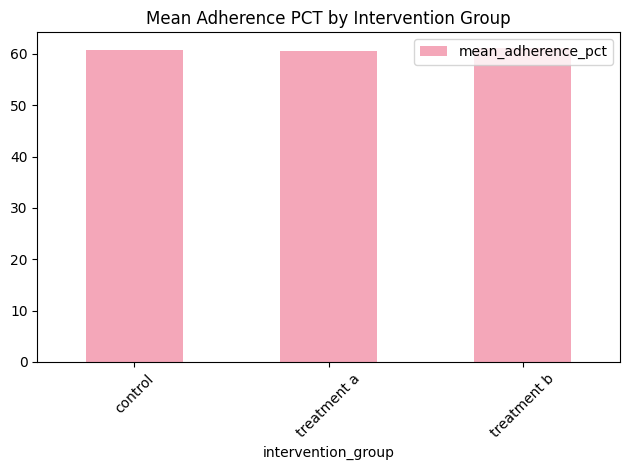

<Axes: title={'center': 'Dropout Counts by Intervention Group'}, xlabel='intervention_group'>

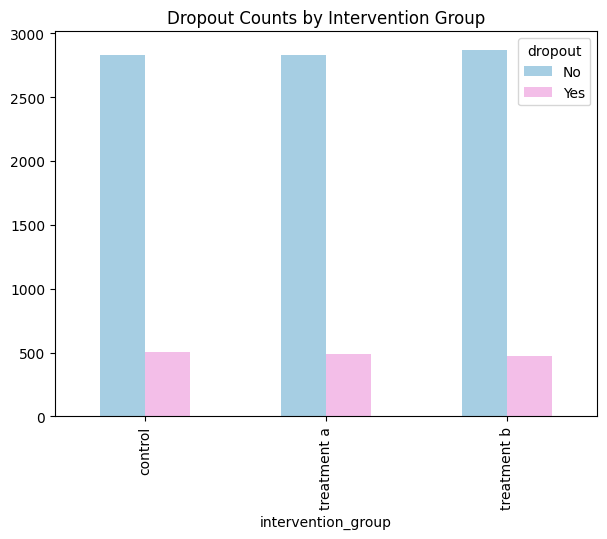

In [51]:
# TODO: Visualization
plot_group_comparison(
    cvd_summary,
    x_col="intervention_group",
    y_col="mean_outcome_cvd",
    title="Mean CVD Rate by Intervention Group",
)

plot_group_comparison(
    adherence_summary,
    x_col="intervention_group",
    y_col="mean_adherence_pct",
    title="Mean Adherence PCT by Intervention Group",
)

cross_tab_inter_dropout.plot(
    kind="bar",
    color=["#a6cee3", "#f3bee8"],  # soft blue and gold
    title="Dropout Counts by Intervention Group",
    figsize=(7, 5),
)

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [42]:
# TODO: Save summary outputs
site_summary.round(2).to_csv("output/q7_site_summary.csv", index=False)

intervention_comparison = pd.merge(
    cvd_summary, adherence_summary, on="intervention_group", how="outer"
)
intervention_comparison.to_csv("output/q7_intervention_comparison.csv", index=False)

best_group = intervention_comparison.loc[
    intervention_comparison["mean_outcome_cvd"].idxmin(), "intervention_group"
]

report = [
    "Final Report",
    "======================",
    "",
    "Summary by Site (Mean Age, BMI, And Blood Pressure By Site:):",
    site_summary.to_string(index=False),
    "",
    "Intervention Group Comparison:",
    "   Mean outcome_cvd By Group:",
    cvd_summary.round(3).to_string(index=False),
    "",
    "   Mean adherence_pct By Group:",
    adherence_summary.round(2).to_string(index=False),
    "",
    "→ When grouped by site, Site D shows the highest mean age, while mean BMI and systolic blood pressure remain relatively consistent across all sites.",
    "→ The mean outcome_CVD rate is highest in the Control group, whereas mean adherence percentage is greatest for Treatment B.",
    "→ The outcome_CVD and adherence_pct values are relatively consistent across all groups.",
]

with open("output/q7_analysis_report.txt", "w") as f:
    f.write("\n".join(report))

print(
    "Saved:",
    "output/q7_site_summary.csv,",
    "output/q7_intervention_comparison.csv,",
    "output/q7_analysis_report.txt",
)

Saved: output/q7_site_summary.csv, output/q7_intervention_comparison.csv, output/q7_analysis_report.txt


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

→ When grouped by site, Site D shows the highest mean age, while mean BMI and systolic blood pressure remain relatively consistent across all sites. 

→ The mean outcome_CVD rate is highest in the Control group, whereas mean adherence percentage is greatest for Treatment B.

→ The outcome_CVD and adherence_pct values are relatively consistent across all groups.
